# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bamboo flat
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | san antonio de pale
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | fort st. john
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | konosha
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | colonia
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | as sulayyil
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | grottaminarda
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | harstad
Processing Record 22 of Set 1 | siwa oasi

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,85.95,87,40,7.00,MY,1727445613
1,grytviken,-54.2811,-36.5092,37.40,81,100,15.08,GS,1727445387
2,bamboo flat,11.7000,92.7167,82.49,83,20,2.30,IN,1727445841
3,isafjordur,66.0755,-23.1240,37.44,70,100,16.11,IS,1727445842
4,san antonio de pale,-1.4014,5.6325,77.76,84,92,14.99,GQ,1727445642


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,85.95,87,40,7.00,MY,1727445613
1,grytviken,-54.2811,-36.5092,37.40,81,100,15.08,GS,1727445387
2,bamboo flat,11.7000,92.7167,82.49,83,20,2.30,IN,1727445841
3,isafjordur,66.0755,-23.1240,37.44,70,100,16.11,IS,1727445842
4,san antonio de pale,-1.4014,5.6325,77.76,84,92,14.99,GQ,1727445642


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

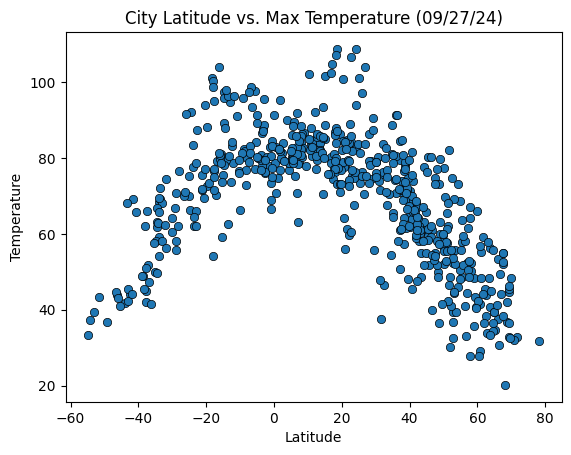

In [27]:
# Build scatter plot for latitude vs. temperature
# Extract latitude and temperature values from city_data
Lats = [city['Lat'] for city in city_data]
Temps = [city['Max Temp'] for city in city_data]

plt.scatter(Lats, Temps, edgecolors='black', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

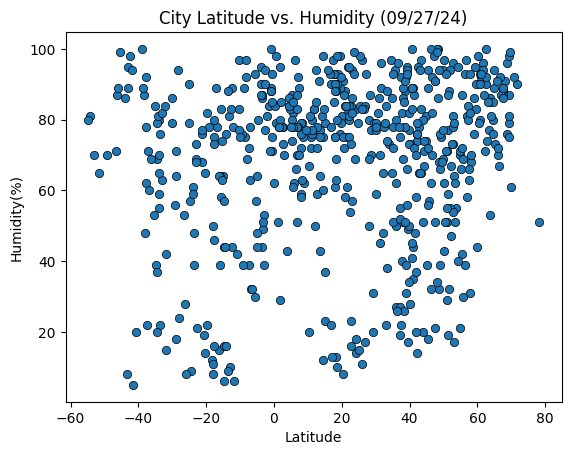

In [28]:
# Build the scatter plots for latitude vs. humidity
Lats = [city['Lat'] for city in city_data]
Humidity = [city['Humidity'] for city in city_data]

plt.scatter(Lats, Humidity, edgecolors='black', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

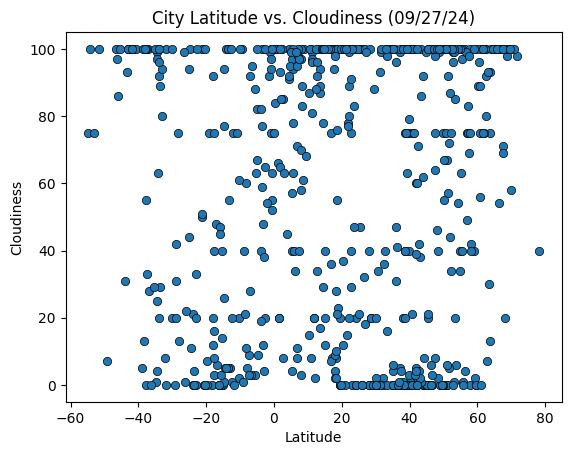

In [29]:
# Build the scatter plots for latitude vs. cloudiness
Lats = [city['Lat'] for city in city_data]
Cloudiness = [city['Cloudiness'] for city in city_data]

plt.scatter(Lats, Cloudiness, edgecolors='black', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

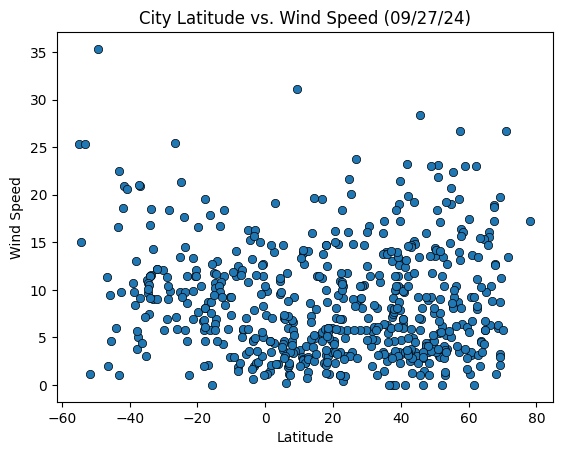

In [30]:
# Build the scatter plots for latitude vs. wind speed
Lats = [city['Lat'] for city in city_data]
Wind_Speed = [city['Wind Speed'] for city in city_data]

plt.scatter(Lats, Wind_Speed, edgecolors='black', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):

	# Run regression on hemisphere weather data
	(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
	
	# Calculate the regression line "y values" from the slope and intercept
	regress_values = x_values * slope + intercept
	
	# Get the equation of the line
	line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
	
	# Create a scatter plot and plot the regression line
	plt.scatter(x_values,y_values)
	plt.plot(x_values,regress_values,"r")
	
	# Annotate the text for the line equation
	plt.annotate(line_eq,(0,0),fontsize=15, color="red")
	plt.xlabel('Latitude')
	plt.ylabel(title)

	# Print r value
	print(f"The r-value is: {rvalue}")
	
	#Print equation of the line
	print(f"The equation of the regression line is: {line_eq}")


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,85.95,87,40,7.00,MY,1727445613
2,bamboo flat,11.7000,92.7167,82.49,83,20,2.30,IN,1727445841
3,isafjordur,66.0755,-23.1240,37.44,70,100,16.11,IS,1727445842
6,fort st. john,56.2499,-120.8529,40.89,93,100,10.36,CA,1727445845
7,qaqortoq,60.7167,-46.0333,41.50,80,56,3.18,GL,1727445846


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,37.40,81,100,15.08,GS,1727445387
4,san antonio de pale,-1.4014,5.6325,77.76,84,92,14.99,GQ,1727445642
5,chonchi,-42.6128,-73.8092,44.11,98,100,9.82,CL,1727445403
10,waitangi,-43.9535,-176.5597,41.83,86,31,5.99,NZ,1727445412
11,carnarvon,-24.8667,113.6333,66.29,57,100,21.34,AU,1727445851


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7925463961105058
The equation of the regression line is: y = -0.7x + 92.62


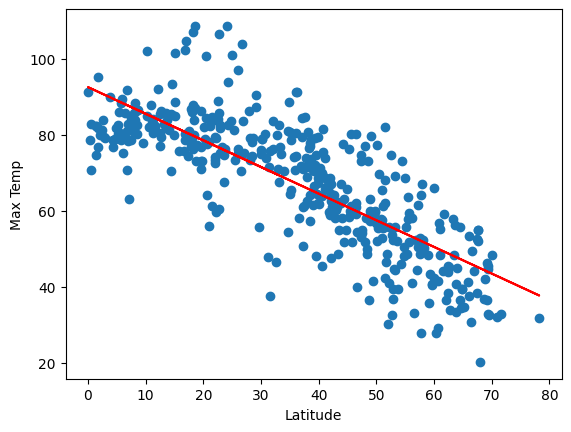

In [43]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(6,30))

The r-value is: 0.7659668919572856
The equation of the regression line is: y = 0.87x + 90.4


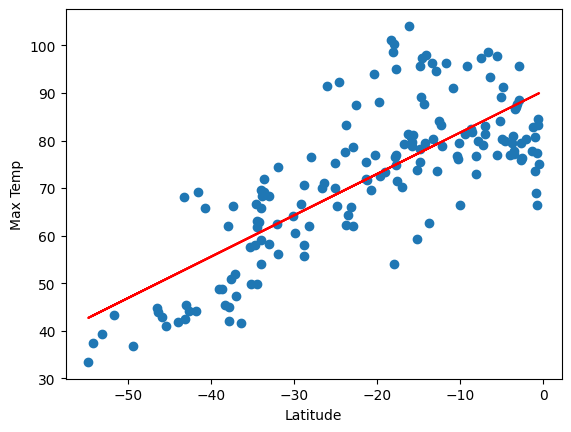

In [44]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp',(6,30))

**Discussion about the linear relationship:** Based on the visuals it appears as the temperature in the Northern Hemisphere goes up the temperature in the Southern Hemisphere goes down. they are inversely related. Also as distance from the equator gets further the temperature tends to drop. That is a linear relationship. There are more variables that would affect these results but since we aren't elevation there will be some outliers.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.020326510758243307
The equation of the regression line is: y = 0.04x + 62.82


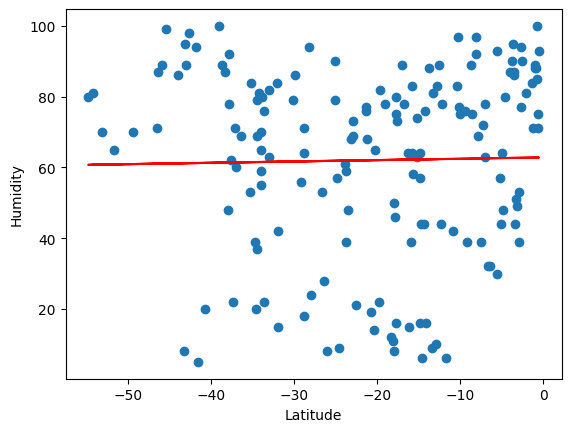

In [45]:
# Northern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity',(6,30))

The r-value is: 0.03270966375107284
The equation of the regression line is: y = 0.04x + 69.7


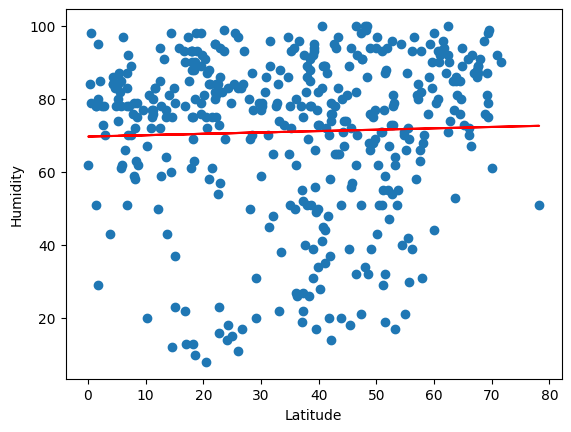

In [51]:
# Southern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity',(6,30))

**Discussion about the linear relationship:** There doesn't seem to be a clear relationship between Humidity and Latitude. Humidity has more to do with local climates, closeness to oceans, and topography. These visuals don't really have a specific relationship although based on the graphs I would say that the further north you go, the more humid it becomes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.020232332518149064
The equation of the regression line is: y = 0.04x + 56.8


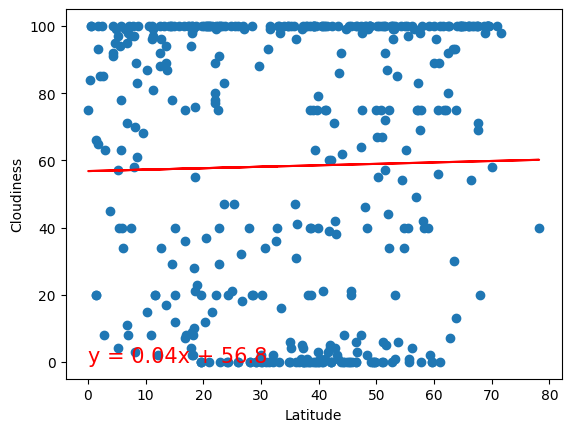

In [56]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(0,0))

The r-value is: -0.15864179540581874
The equation of the regression line is: y = -0.44x + 40.9


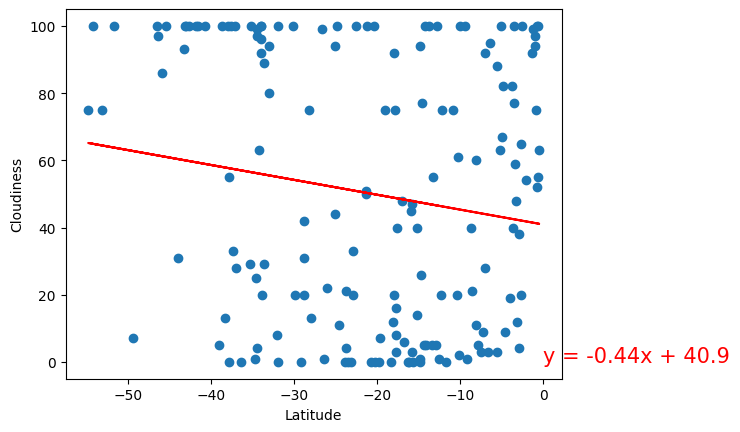

In [52]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness',(0,0))

**Discussion about the linear relationship:** There seem to be less clouds at the equator as there are further north and further south. This shows a non linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18546877264483722
The equation of the regression line is: y = 0.06x + 6.23


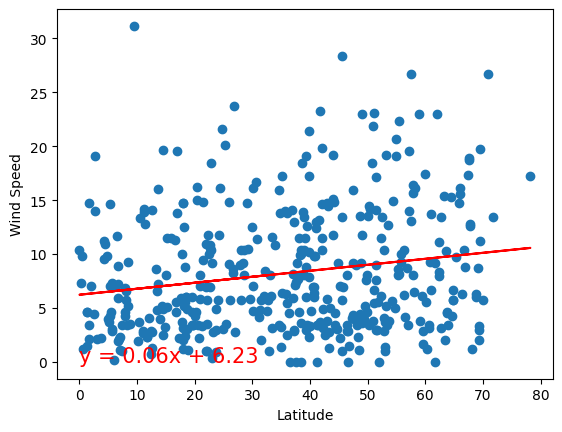

In [53]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed',(0,0))

The r-value is: -0.3303209337498228
The equation of the regression line is: y = -0.13x + 6.98


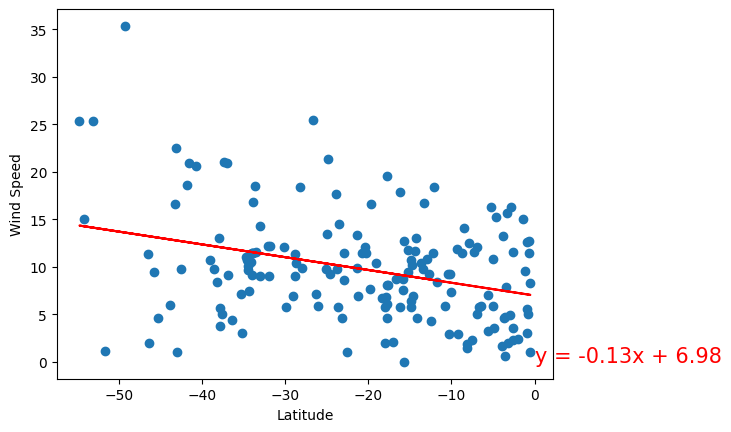

In [54]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed',(0,0))

**Discussion about the linear relationship:** Here is another non linear relationship. These graphs imply that the wind speed at the equator trends lower than places further away north to south.